**Date:** 3.4.21
**Name:** Subroto Singha

- Implemented XGBoosting
- Implemented Gradient Boosting
- Implemented RandomForest
- Used PCA to reduce dimension
- Used transformed dimension to check the accuracy in XGBoosting, Gradient Boosting,RandomForest, and Neural Network
- XGBoosting is performing better and able to identify the true target values. Please refer to the confusion matrix in this Notebook
- Probably better tuning may increase the accuracy

In [388]:
#necessary imports
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [389]:
#raw dataset loading
df=pd.read_csv('FixationStatistics.txt', sep='\t', lineterminator='\r')
df.head(n=100)

,ParticipantID,TrialID,TrialIndex,SegmentID,SegmentIndex,StartTime(ms),EndTime(ms),Length(ms),StartTimestamp,EndTimestamp,StartTimeGMT,EndTimeGMT,ValidityRate,PageFixations,WindowFixations,PageBlinks,WindowBlinks,BottomWindowBound_Page,TopWindowBound_Page,BottomWindowBound_Session,TopWindowBound_Session,NumberOfReports,FirstReportType,FirstReportContent,FirstReportTimestamp,FirstReportTimesGMT,FirstReportSessionTime(ms),FirstReportTrialTime(ms),FirstReportSegmentTime(ms),FixDurN,FixDurMed,FixDurMean,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAmpN,SacAmpMed,SacAmpMean,SacAmpSD,SacAmpMin,SacAmpMax,SacAmpRange,SacAmpSkew,SacAmpKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,SacAngRelN,SacAngRelMed,SacAngRelMean,SacAngRelSD,SacAngRelMin,SacAngRelMax,SacAngRelRange,SacAngRelSkew,SacAngRelKur,SacVelN,SacVelMed,SacVelMean,SacVelSD,SacVelMin,SacVelMax,SacVelRange,SacVelSkew,SacVelKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,FirstPassFixDurMean,FirstPassFixDurSD,FirstPassFixProp,EndOfClauseFixDurMean,EndOfClauseFixDurSD,EndOfClauseFixProp,RegFixDurMean,RegFixDurSD,RegFixProp,SingleFixDurMean,SingleFixDurSD,SingleFixProp,NoWordFixDurMean,NoWordFixDurSD,NoWordFixProp,GazeFixDurMean,GazeFixDurSD,GazeFixProp,WordSkipProp,propCrossLineSaccades,readingDepth,WordLenToFixDurCorr,FreqToFixDurCorr,NumSynsToFixDurCorr,HypDepthToFixDurCorr
0,\nBE7-P1002-Memphis,MainText,1.0,NaN,57.0,1294808.0,1322271.0,27463.0,1.382120e+12,1.382120e+12,46:38.0,47:05.5,0.873786,100.0,11.0,7.0,0.0,12650.0,16650.0,1307458.0,1311458.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,200.000000,221.000000,101.294620,83.0,366.0,283.000000,0.132989,-1.389706,0.429,10.0,17.000000,123.300000,162.960834,16.0,450.000000,434.0,1.244961,0.053705,10.000000,132.924202,210.010957,210.956418,80.856303,793.888636,713.032333,2.860900,8.535334,10.0,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,9.0,353.875658,240.549308,174.528607,4.791021,359.971189,355.180168,-0.857144,-1.710707,10.0,6.684761,5.484460,3.703560,0.407012,10.050112,9.643100,-0.457247,-1.396898,1.000000,1.972000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,261.0,102.0,0.55,NaN,NaN,0.0,NaN,NaN,0.00,290.0,83.0,0.45,164.0,80.0,0.55,163.0,89.0,0.45,0.636364,0.100000,153.0,-0.375,-0.223,0.404,-0.560
1,\nBE7-P1002-Memphis,MainText,1.0,NaN,56.0,1274590.0,1294808.0,20218.0,1.382120e+12,1.382120e+12,46:17.8,46:38.0,0.839242,72.0,11.0,4.0,0.0,12650.0,16650.0,1287240.0,1291240.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,183.000000,209.090909,107.757556,133.0,499.0,366.000000,2.241717,5.662505,0.436,10.0,25.500000,104.800000,145.311772,16.0,383.000000,367.0,1.609426,1.031941,10.000000,155.985073,274.138920,289.943023,66.923698,926.600337,859.676639,1.787491,2.228981,10.0,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,9.0,351.088886,198.966328,183.765405,3.750852,359.611378,355.860527,-0.270329,-2.570038,10.0,4.602806,5.216583,3.525370,0.660415,11.163859,10.503445,0.681916,-0.361619,1.000000,2.195000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,209.0,120.0,0.82,NaN,NaN,0.0,133.0,NaN,0.09,208.0,128.0,0.73,134.0,NaN,0.09,200.0,23.0,0.18,1.384615,0.200000,60.0,0.058,NaN,-0.078,-0.657
2,\nBE7-P1002-Memphis,MainText,1.0,NaN,55.0,1251125.0,1274590.0,23465.0,1.382120e+12,1.382120e+12,45:54.3,46:17.8,0.762784,73.0,13.0,4.0,0.0,12650.0,16650.0,1263775.0,1267775.0,0.0,no

In [390]:
#drop ID columns
df=df.drop(columns=['ParticipantID','TrialID','SegmentIndex','SegmentID','TrialIndex'])
df.head()

,StartTime(ms),EndTime(ms),Length(ms),StartTimestamp,EndTimestamp,StartTimeGMT,EndTimeGMT,ValidityRate,PageFixations,WindowFixations,PageBlinks,WindowBlinks,BottomWindowBound_Page,TopWindowBound_Page,BottomWindowBound_Session,TopWindowBound_Session,NumberOfReports,FirstReportType,FirstReportContent,FirstReportTimestamp,FirstReportTimesGMT,FirstReportSessionTime(ms),FirstReportTrialTime(ms),FirstReportSegmentTime(ms),FixDurN,FixDurMed,FixDurMean,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAmpN,SacAmpMed,SacAmpMean,SacAmpSD,SacAmpMin,SacAmpMax,SacAmpRange,SacAmpSkew,SacAmpKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,SacAngRelN,SacAngRelMed,SacAngRelMean,SacAngRelSD,SacAngRelMin,SacAngRelMax,SacAngRelRange,SacAngRelSkew,SacAngRelKur,SacVelN,SacVelMed,SacVelMean,SacVelSD,SacVelMin,SacVelMax,SacVelRange,SacVelSkew,SacVelKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,FirstPassFixDurMean,FirstPassFixDurSD,FirstPassFixProp,EndOfClauseFixDurMean,EndOfClauseFixDurSD,EndOfClauseFixProp,RegFixDurMean,RegFixDurSD,RegFixProp,SingleFixDurMean,SingleFixDurSD,SingleFixProp,NoWordFixDurMean,NoWordFixDurSD,NoWordFixProp,GazeFixDurMean,GazeFixDurSD,GazeFixProp,WordSkipProp,propCrossLineSaccades,readingDepth,WordLenToFixDurCorr,FreqToFixDurCorr,NumSynsToFixDurCorr,HypDepthToFixDurCorr
0,1294808.0,1322271.0,27463.0,1.382120e+12,1.382120e+12,46:38.0,47:05.5,0.873786,100.0,11.0,7.0,0.0,12650.0,16650.0,1307458.0,1311458.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,200.0,221.000000,101.294620,83.0,366.0,283.0,0.132989,-1.389706,0.429,10.0,17.0,123.300000,162.960834,16.0,450.0,434.0,1.244961,0.053705,10.0,132.924202,210.010957,210.956418,80.856303,793.888636,713.032333,2.860900,8.535334,10.0,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,9.0,353.875658,240.549308,174.528607,4.791021,359.971189,355.180168,-0.857144,-1.710707,10.0,6.684761,5.484460,3.703560,0.407012,10.050112,9.643100,-0.457247,-1.396898,1.000000,1.972,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,261.0,102.0,0.55,NaN,NaN,0.0,NaN,NaN,0.00,290.0,83.0,0.45,164.0,80.0,0.55,163.0,89.0,0.45,0.636364,0.100000,153.0,-0.375,-0.223,0.404,-0.560
1,1274590.0,1294808.0,20218.0,1.382120e+12,1.382120e+12,46:17.8,46:38.0,0.839242,72.0,11.0,4.0,0.0,12650.0,16650.0,1287240.0,1291240.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,183.0,209.090909,107.757556,133.0,499.0,366.0,2.241717,5.662505,0.436,10.0,25.5,104.800000,145.311772,16.0,383.0,367.0,1.609426,1.031941,10.0,155.985073,274.138920,289.943023,66.923698,926.600337,859.676639,1.787491,2.228981,10.0,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,9.0,351.088886,198.966328,183.765405,3.750852,359.611378,355.860527,-0.270329,-2.570038,10.0,4.602806,5.216583,3.525370,0.660415,11.163859,10.503445,0.681916,-0.361619,1.000000,2.195,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,209.0,120.0,0.82,NaN,NaN,0.0,133.0,NaN,0.09,208.0,128.0,0.73,134.0,NaN,0.09,200.0,23.0,0.18,1.384615,0.200000,60.0,0.058,NaN,-0.078,-0.657
2,1251125.0,1274590.0,23465.0,1.382120e+12,1.382120e+12,45:54.3,46:17.8,0.762784,73.0,13.0,4.0,0.0,12650.0,16650.0,1263775.0,1267775.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,13.0,167.0,188.538462,100.261006,83.0,416.0,333.0,1.010131,0.510088,0.554,12.0,42.0,120.500000,158.185449,16.0,466.0,450.0,1.434272,0.694127,12.0,118.155517,256.603244,288.874145,66.587272,887.889747,821.302475,1.815159,

In [391]:
#Global Features
#All Found Global Features Except Saccade Distance, Number of Saccades, Fixation Dispersion and Blink Count
X_Global_Features=df[['FixDurN','FixDurMed','FixDurSD','FixDurMin','FixDurMax','FixDurRange','FixDurSkew','FixDurKur','FxDisp','SacDurN','SacDurMed','SacDurMean','SacDurSD','SacDurMin','SacDurMax','SacDurRange','SacDurSkew','SacDurKur','SacAngAbsN','SacAngAbsMed','SacAngAbsMean','SacAngAbsSD','SacAngAbsMin','SacAngAbsMax','SacAngAbsRange','SacAngAbsSkew','SacAngAbsKur','PupilDiametersZN','PupilDiametersZMed','PupilDiametersZMean','PupilDiametersZSD','PupilDiametersZMin','PupilDiametersZMax','PupilDiametersZRange','PupilDiametersZSkew','PupilDiametersZKur','horizontalSaccadeProp','FxSacRatio','BlinkDurN','BlinkDurMed','BlinkDurMean','BlinkDurSD','BlinkDurMin','BlinkDurMax','BlinkDurRange','BlinkDurSkew','BlinkDurKur']]
#print(X_Global_Features.head())
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_Global_Features=imp_mean.fit_transform(X_Global_Features)
print(X_Global_Features.shape)

(4077, 47)


In [392]:
df.loc[df['NumberOfReports'] ==0.0, 'NumberOfReports_new'] = 0.0 
df.loc[df['NumberOfReports'] >=1.0 , 'NumberOfReports_new'] = 1.0

In [393]:
df.head()

,StartTime(ms),EndTime(ms),Length(ms),StartTimestamp,EndTimestamp,StartTimeGMT,EndTimeGMT,ValidityRate,PageFixations,WindowFixations,PageBlinks,WindowBlinks,BottomWindowBound_Page,TopWindowBound_Page,BottomWindowBound_Session,TopWindowBound_Session,NumberOfReports,FirstReportType,FirstReportContent,FirstReportTimestamp,FirstReportTimesGMT,FirstReportSessionTime(ms),FirstReportTrialTime(ms),FirstReportSegmentTime(ms),FixDurN,FixDurMed,FixDurMean,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAmpN,SacAmpMed,SacAmpMean,SacAmpSD,SacAmpMin,SacAmpMax,SacAmpRange,SacAmpSkew,SacAmpKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,SacAngRelN,SacAngRelMed,SacAngRelMean,SacAngRelSD,SacAngRelMin,SacAngRelMax,SacAngRelRange,SacAngRelSkew,SacAngRelKur,SacVelN,SacVelMed,SacVelMean,SacVelSD,SacVelMin,SacVelMax,SacVelRange,SacVelSkew,SacVelKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,FirstPassFixDurMean,FirstPassFixDurSD,FirstPassFixProp,EndOfClauseFixDurMean,EndOfClauseFixDurSD,EndOfClauseFixProp,RegFixDurMean,RegFixDurSD,RegFixProp,SingleFixDurMean,SingleFixDurSD,SingleFixProp,NoWordFixDurMean,NoWordFixDurSD,NoWordFixProp,GazeFixDurMean,GazeFixDurSD,GazeFixProp,WordSkipProp,propCrossLineSaccades,readingDepth,WordLenToFixDurCorr,FreqToFixDurCorr,NumSynsToFixDurCorr,HypDepthToFixDurCorr,NumberOfReports_new
0,1294808.0,1322271.0,27463.0,1.382120e+12,1.382120e+12,46:38.0,47:05.5,0.873786,100.0,11.0,7.0,0.0,12650.0,16650.0,1307458.0,1311458.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,200.0,221.000000,101.294620,83.0,366.0,283.0,0.132989,-1.389706,0.429,10.0,17.0,123.300000,162.960834,16.0,450.0,434.0,1.244961,0.053705,10.0,132.924202,210.010957,210.956418,80.856303,793.888636,713.032333,2.860900,8.535334,10.0,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,9.0,353.875658,240.549308,174.528607,4.791021,359.971189,355.180168,-0.857144,-1.710707,10.0,6.684761,5.484460,3.703560,0.407012,10.050112,9.643100,-0.457247,-1.396898,1.000000,1.972,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,261.0,102.0,0.55,NaN,NaN,0.0,NaN,NaN,0.00,290.0,83.0,0.45,164.0,80.0,0.55,163.0,89.0,0.45,0.636364,0.100000,153.0,-0.375,-0.223,0.404,-0.560,0.0
1,1274590.0,1294808.0,20218.0,1.382120e+12,1.382120e+12,46:17.8,46:38.0,0.839242,72.0,11.0,4.0,0.0,12650.0,16650.0,1287240.0,1291240.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,11.0,183.0,209.090909,107.757556,133.0,499.0,366.0,2.241717,5.662505,0.436,10.0,25.5,104.800000,145.311772,16.0,383.0,367.0,1.609426,1.031941,10.0,155.985073,274.138920,289.943023,66.923698,926.600337,859.676639,1.787491,2.228981,10.0,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,9.0,351.088886,198.966328,183.765405,3.750852,359.611378,355.860527,-0.270329,-2.570038,10.0,4.602806,5.216583,3.525370,0.660415,11.163859,10.503445,0.681916,-0.361619,1.000000,2.195,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,209.0,120.0,0.82,NaN,NaN,0.0,133.0,NaN,0.09,208.0,128.0,0.73,134.0,NaN,0.09,200.0,23.0,0.18,1.384615,0.200000,60.0,0.058,NaN,-0.078,-0.657,0.0
2,1251125.0,1274590.0,23465.0,1.382120e+12,1.382120e+12,45:54.3,46:17.8,0.762784,73.0,13.0,4.0,0.0,12650.0,16650.0,1263775.0,1267775.0,0.0,none,none,NaN,NaN,NaN,NaN,NaN,13.0,167.0,188.538462,100.261006,83.0,416.0,333.0,1.010131,0.510088,0.554,12.0,42.0,120.500000,158.185449,16.0,466.0,450.0,1.434272,0.694127,12.0,118.155517,256.603244,288.874145,66.587272,887

In [394]:
y=df['NumberOfReports_new'].fillna(0)
y.shape

(4077,)

In [395]:
print(sum(y==0.0))
print(sum(y==1.0))

2964
1113


In [396]:
#data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Global_Features, y, test_size=0.05, random_state=123,stratify=y)

In [397]:
x_train.shape

(3873, 47)

In [398]:
y_train.shape

(3873,)

# Logistic Regression

In [399]:
from sklearn.linear_model import LogisticRegression
#logisticRegr = LogisticRegression()
#logisticRegr.fit(x_train, y_train)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1',C=0.001,solver='saga'))
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7254901960784313

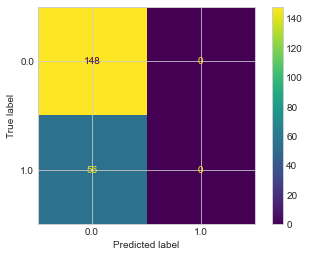

In [400]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
plot_confusion_matrix(pipe, x_test, y_test)
plt.show()

# XGBoost

In [401]:
from xgboost import XGBClassifier

In [402]:
model = XGBClassifier(random_state=0,learning_rate=0.04)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[12:51:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 77.94%


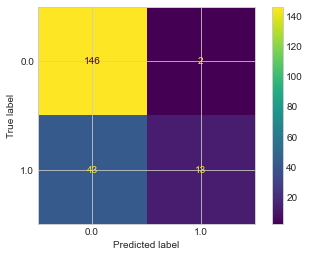

In [403]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

# RandomForest

In [404]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.55%


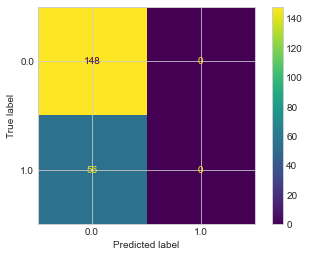

In [405]:
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

# GradientBoosting

In [406]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
y_pred = clf1.predict(x_test)
predictions1 = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.04%


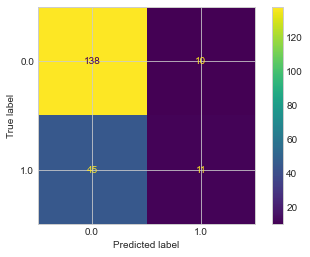

In [407]:
plot_confusion_matrix(clf1, x_test, y_test)
plt.show()

# PCA

In [408]:
from sklearn.decomposition import PCA
pca = PCA()
X_Global_Features_pca=pca.fit_transform(X_Global_Features)

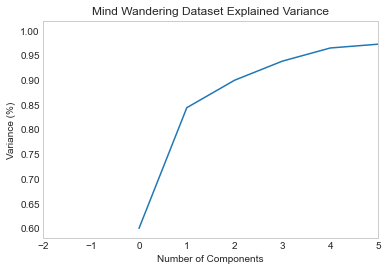

In [409]:
plt.figure()
plt.xlim(-2,5)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Mind Wandering Dataset Explained Variance')
plt.grid()
plt.show()

In [410]:
#data splitting
x_train, x_test, y_train, y_test = train_test_split(X_Global_Features_pca, y, test_size=0.05, random_state=123,stratify=y)

In [411]:
model = XGBClassifier(random_state=0,learning_rate=0.04)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/subrotosingha/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 74.02%


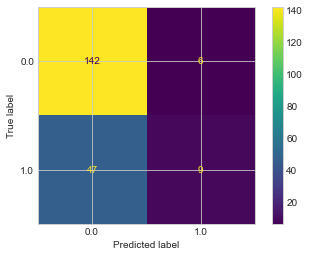

In [412]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [413]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.55%


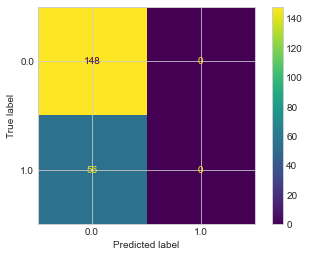

In [414]:
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [415]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
y_pred = clf1.predict(x_test)
predictions1 = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.02%


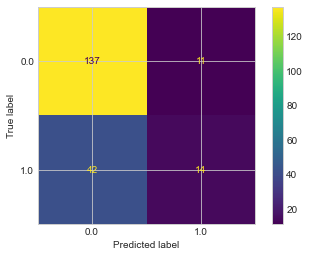

In [416]:
plot_confusion_matrix(clf1, x_test, y_test)
plt.show()

# Neural Network

In [417]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [418]:
input_shape = [x_train.shape[1]]

# model
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

In [419]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_78 (Batc (None, 47)                188       
_________________________________________________________________
dense_78 (Dense)             (None, 512)               24576     
_________________________________________________________________
batch_normalization_79 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_80 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_53 (Dropout)         (None, 256)             

In [420]:
#ADAM
model.compile(optimizer='ADAM',loss='binary_crossentropy',metrics=['binary_accuracy'])

Epoch 1/200
8/8 [==============================] - 1s 31ms/step - loss: 0.8629 - binary_accuracy: 0.5505 - val_loss: 0.6699 - val_binary_accuracy: 0.6520
Epoch 2/200
8/8 [==============================] - 0s 14ms/step - loss: 0.7376 - binary_accuracy: 0.6192 - val_loss: 0.6517 - val_binary_accuracy: 0.7059
Epoch 3/200
8/8 [==============================] - 0s 15ms/step - loss: 0.6639 - binary_accuracy: 0.6640 - val_loss: 0.6148 - val_binary_accuracy: 0.7157
Epoch 4/200
8/8 [==============================] - 0s 15ms/step - loss: 0.6235 - binary_accuracy: 0.6862 - val_loss: 0.5978 - val_binary_accuracy: 0.7010
Epoch 5/200
8/8 [==============================] - 0s 15ms/step - loss: 0.5774 - binary_accuracy: 0.7179 - val_loss: 0.5962 - val_binary_accuracy: 0.7108
Epoch 6/200
8/8 [==============================] - 0s 14ms/step - loss: 0.5704 - binary_accuracy: 0.7337 - val_loss: 0.5947 - val_binary_accuracy: 0.7108
Epoch 7/200
8/8 [==============================] - 0s 15ms/step - loss: 0.54

<AxesSubplot:title={'center':'Accuracy'}>

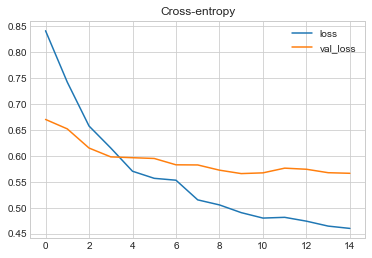

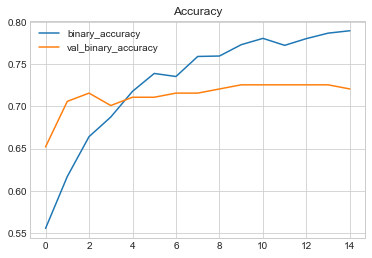

In [421]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
8/8 [==============================] - 1s 33ms/step - loss: 0.8682 - binary_accuracy: 0.5471 - val_loss: 0.6161 - val_binary_accuracy: 0.7059
Epoch 2/200
8/8 [==============================] - 0s 14ms/step - loss: 0.6905 - binary_accuracy: 0.6391 - val_loss: 0.6436 - val_binary_accuracy: 0.6765
Epoch 3/200
8/8 [==============================] - 0s 13ms/step - loss: 0.6528 - binary_accuracy: 0.6599 - val_loss: 0.6129 - val_binary_accuracy: 0.6961
Epoch 4/200
8/8 [==============================] - 0s 15ms/step - loss: 0.6088 - binary_accuracy: 0.7031 - val_loss: 0.5807 - val_binary_accuracy: 0.7304
Epoch 5/200
8/8 [==============================] - 0s 15ms/step - loss: 0.5823 - binary_accuracy: 0.7133 - val_loss: 0.5901 - val_binary_accuracy: 0.7304
Epoch 6/200
8/8 [==============================] - 0s 15ms/step - loss: 0.5600 - binary_accuracy: 0.7265 - val_loss: 0.5688 - val_binary_accuracy: 0.7206
Epoch 7/200
8/8 [==============================] - 0s 15ms/step - loss: 0.52

<AxesSubplot:title={'center':'Accuracy'}>

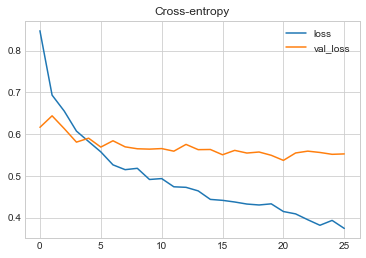

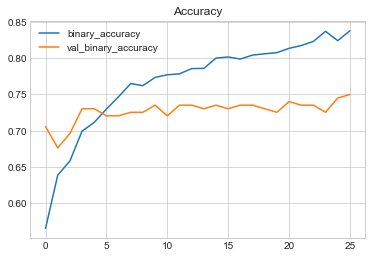

In [422]:
# RMSProp
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Epoch 1/200
8/8 [==============================] - 1s 31ms/step - loss: 1.0219 - binary_accuracy: 0.4649 - val_loss: 0.6568 - val_binary_accuracy: 0.6569
Epoch 2/200
8/8 [==============================] - 0s 14ms/step - loss: 0.9435 - binary_accuracy: 0.4828 - val_loss: 0.6716 - val_binary_accuracy: 0.6225
Epoch 3/200
8/8 [==============================] - 0s 15ms/step - loss: 0.8461 - binary_accuracy: 0.5205 - val_loss: 0.6743 - val_binary_accuracy: 0.6176
Epoch 4/200
8/8 [==============================] - 0s 14ms/step - loss: 0.8016 - binary_accuracy: 0.5518 - val_loss: 0.6711 - val_binary_accuracy: 0.6324
Epoch 5/200
8/8 [==============================] - 0s 14ms/step - loss: 0.7958 - binary_accuracy: 0.5718 - val_loss: 0.6648 - val_binary_accuracy: 0.6569
Epoch 6/200
8/8 [==============================] - 0s 15ms/step - loss: 0.7534 - binary_accuracy: 0.5946 - val_loss: 0.6597 - val_binary_accuracy: 0.6716


<AxesSubplot:title={'center':'Accuracy'}>

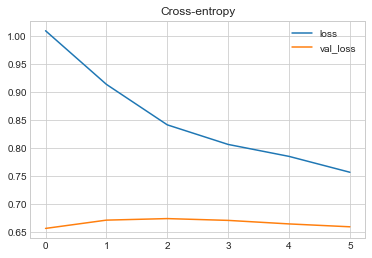

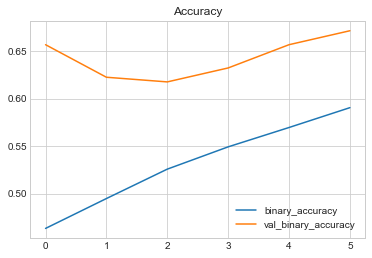

In [423]:
# SGD
# model
model1 = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid'),
])

model1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model1.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")